<a href="https://colab.research.google.com/github/dmsophia/prova2_mod10/blob/main/ITL_SI10_2024_Prova_P2_Sophia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <img src="https://www.inteli.edu.br/wp-content/uploads/2022/04/28103439/Logo-Container.png" />
</center>

# `[SI10-2024-P2]` - Prova Prática

Sistemas de Informação - Módulo 10 - Turma 4



**Nome**: *Escreva seu nome aqui.*

**ANTES DE PROSSEGUIR FAÇA UMA CÓPIA DESTE NOTEBOOK**

----

## Contexto

O [SAGe](https://sage.fapesp.br/SAGe_WEB/jsp/loginAdm.jsp) é um sistema desenvolvido pela Fundação de Amparo à Pesquisa do Estado de São Paulo (FAPESP) para beneficiar participantes de seus programas de fomento. Esse sistema é utilizado para diversas finalidades, como inscrição em processos de fomento, prestação de contas e consulta de recebimentos. Devido à baixa frequência de uso (em média, quatro vezes ao ano), é comum que os usuários esqueçam suas senhas entre um acesso e outro.

## Problema

Alguns funcionários do call center da FAPESP andam recebendo há um bom tempo muitas ligações dizendo que os usuários "não conseguem recuperar a senha". Os usuários alegam que não conseguem preencher o formulário de recuperação de senha, que "dá erro", que desistem etc.

Os gestores do sistema encaminharam o problema ao time de desenvolvimento, que julgou ser necessário investigar melhor junto ao time de Design. Os times dispõem de dados de Analytics sobre a página, e a primeira ação foi extrair um relatório desde o início do ano de 2024 para tentar entender o comportamento do usuário sobre a plataforma, especialmente na página de recuperação de senha.


## Fluxo de interação do usuário (atual)

O fluxo de interação do usuário para recuperação de senha prevê as seguintes telas (você pode explorar melhor cada etapa entrando no [SAGe](https://sage.fapesp.br/SAGe_WEB/jsp/loginAdm.jsp)):


<table>
  <tr>
    <td>
      <img src="https://i.imgur.com/HrvpNqi.png" />
    </td>
  </tr>
  <tr>
    <td align="center">
      <strong>
        Figura 1. Tela Inicial
      </strong>
    </td>
  </tr>  
</table>

<table>
  <tr>
    <td>
      <img src="https://i.imgur.com/grH5r1T.png" />
    </td>
  </tr>
  <tr>
    <td align="center">
      <strong>
        Figura 2. Popup que abre para redefinição de senha ou identificação
      </strong>
    </td>
  </tr>  
</table>

<table>
  <tr>
    <td>
      <img src="https://i.imgur.com/9SRpd8X.png" />
    </td>
  </tr>
  <tr>
    <td align="center">
      <strong>
        Figura 3. Caso dê certo o preenchimento
      </strong>
    </td>
  </tr>  
</table>

<table>
  <tr>
    <td>
      <img src="https://i.imgur.com/rqvYON2.png" />
    </td>
  </tr>
  <tr>
    <td align="center">
      <strong>
        Figura 4. Emissão de alertas em casos de erro
      </strong>
    </td>
  </tr>  
</table>

<table>
  <tr>
    <td>
      <img src="https://i.imgur.com/rqvYON2.png" />
    </td>
  </tr>
  <tr>
    <td align="center">
      <strong>
        Figura 5. Esqueci minha senha
      </strong>
    </td>
  </tr>  
</table>

## Dados extraídos do Analytics

In [71]:
# Bibliotecas utilizadas neste caderno
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

### Antes do Teste A/B


O conjunto dados extraídos do Analytics referente ao período de 01/01/2024 - 30/04/2024 pode ser obtido ao executar os códigos a seguir:

In [72]:
# Importação dos dados do Analytics
# https://drive.google.com/file/d/10kV0AnlL4WxJ5SZVmSYM9guq6biAq9hR/view?usp=sharing
!gdown 10kV0AnlL4WxJ5SZVmSYM9guq6biAq9hR

Downloading...
From: https://drive.google.com/uc?id=10kV0AnlL4WxJ5SZVmSYM9guq6biAq9hR
To: /content/ITL-SI10-2024-P2-analytics-antes.csv
100% 148k/148k [00:00<00:00, 7.09MB/s]


In [73]:
# Lê o dataset referente aos acessos antes de se aplicar o teste A/B
antes_df = pd.read_csv('/content/ITL-SI10-2024-P2-analytics-antes.csv')
antes_df.tail()

,Data,Hora,Usuário_ID,Tentativa,Resultado,Tempo_na_Página,Páginas_Visitadas,Tempo_Carregamento,Scroll_Profundidade,Cliques,Tempo_Interação,Taxa_de_Rejeição,Abandono,Mensagem_de_Erro,Navegador,Dispositivo,IP,Localização
995,2024-04-29,20:46:11,1925,2,sucesso,109,19,1613,84.800931,8,42,61.852319,não,NaN,Edge,tablet,193.23.116.22,"Rio de Janeiro, BR"
996,2024-04-29,16:41:54,1546,0,sucesso,30,8,2320,68.308041,23,30,77.220645,não,NaN,Chrome,celular,249.156.209.1,"Campinas, BR"
997,2024-04-29,00:02:50,1848,2,sucesso,125,14,2634,21.301598,17,63,42.058384,não,NaN,Safari,desktop,82.250.243.249,"São Paulo, BR"
998,2024-04-29,06:42:09,1468,0,sucesso,75,15,1577,90.530453,40,22,10.070072,não,NaN,Firefox,desktop,94.93.72.223,"São Paulo, BR"
999,2024-04-29,05:14:26,1642,2,sucesso,124,7,2027,64.457295,2,25,36.947753,não,NaN,Edge,desktop,5.90.141.134,"Campinas, BR"


In [74]:
df_encoded = antes_df[['Scroll_Profundidade', 'Cliques', 'Páginas_Visitadas', 'Tempo_Interação', 'Tentativa', 'Páginas_Visitadas', 'Taxa_de_Rejeição']]

In [75]:
import plotly.graph_objs as go

df_corr = df_encoded.corr()

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()


### Durante o Teste A/B

Suponha que um teste A/B rodou no período de 01/05/2024 a 31/05/2024. Os dados podem ser obtidos a seguir.

In [76]:
# Importação dos dados do Analytics (Durante o teste A/B)

# Grupo A
# https://drive.google.com/file/d/15JWvA9bHaGkT0NxCwIxQV1Z1q6p7WAjt/view?usp=sharing
!gdown 15JWvA9bHaGkT0NxCwIxQV1Z1q6p7WAjt

# Grupo B
# https://drive.google.com/file/d/12mGIbg-J5YioNB1WffoMIEHv4arcQZcc/view?usp=drive_link
!gdown 12mGIbg-J5YioNB1WffoMIEHv4arcQZcc

Downloading...
From: https://drive.google.com/uc?id=15JWvA9bHaGkT0NxCwIxQV1Z1q6p7WAjt
To: /content/ITL-SI10-2024-P2-analytics-durante-grupo-A.csv
100% 148k/148k [00:00<00:00, 5.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=12mGIbg-J5YioNB1WffoMIEHv4arcQZcc
To: /content/ITL-SI10-2024-P2-analytics-durante-grupo-B.csv
100% 74.1k/74.1k [00:00<00:00, 5.15MB/s]


In [77]:
# Faz a leitura do analytics para o grupo controle (A) e o grupo de teste (B)
grupo_a_df = pd.read_csv('/content/ITL-SI10-2024-P2-analytics-durante-grupo-A.csv')
grupo_a_df.head()

,Data,Hora,Usuário_ID,Tentativa,Resultado,Tempo_na_Página,Páginas_Visitadas,Tempo_Carregamento,Scroll_Profundidade,Cliques,Tempo_Interação,Taxa_de_Rejeição,Abandono,Mensagem_de_Erro,Navegador,Dispositivo,IP,Localização
0,2024-05-01,08:04:01,1097,1,sucesso,127,13,1774,93.316351,10,67,93.198502,não,NaN,Firefox,desktop,2.55.166.224,"Campinas, BR"
1,2024-05-01,14:24:43,1141,2,sucesso,123,11,2415,75.686670,12,56,77.476421,não,NaN,Chrome,celular,77.173.186.31,"Campinas, BR"
2,2024-05-01,00:43:22,1230,1,erro no formulário,98,16,1944,40.575390,24,78,99.195637,sim,Campo obrigatório,Edge,celular,32.109.171.225,"Rio de Janeiro, BR"
3,2024-05-01,23:14:29,1334,2,sucesso,166,18,1741,78.294204,15,46,36.084993,não,NaN,Edge,celular,27.46.96.75,"São Paulo, BR"
4,2024-05-01,15:14:54,1274,2,sucesso,132,19,1717,73.383012,4,63,45.207657,não,NaN,Chrome,tablet,139.207.255.96,"São Paulo, BR"


In [78]:
# Faz a leitura do analytics para o grupo controle (A) e o grupo de teste (B)
grupo_b_df = pd.read_csv('/content/ITL-SI10-2024-P2-analytics-durante-grupo-B.csv')
grupo_b_df.head()

,Data,Hora,Usuário_ID,Tentativa,Resultado,Tempo_na_Página,Páginas_Visitadas,Tempo_Carregamento,Scroll_Profundidade,Cliques,Tempo_Interação,Taxa_de_Rejeição,Abandono,Mensagem_de_Erro,Navegador,Dispositivo,IP,Localização
0,2024-05-01,08:17:06,1902,1,sucesso,80,19,1973,50.407681,20,79,2.144795,não,NaN,Edge,desktop,62.98.127.222,"São Paulo, BR"
1,2024-05-01,15:16:48,1674,1,sucesso,100,4,2036,73.360529,48,51,24.851049,não,NaN,Edge,celular,21.89.107.127,"Belo Horizonte, BR"
2,2024-05-01,18:08:04,1755,1,sucesso,111,5,818,14.521006,47,59,6.380459,não,NaN,Safari,celular,129.5.36.97,"Rio de Janeiro, BR"
3,2024-05-01,07:01:42,1904,1,erro no servidor,59,14,1233,8.522866,33,59,3.476768,não,NaN,Edge,celular,55.121.121.140,"São Paulo, BR"
4,2024-05-01,05:55:03,1840,1,sucesso,101,1,1094,15.549566,27,57,26.292869,não,NaN,Edge,celular,202.28.186.226,"São Paulo, BR"


## Tarefas

### Tarefa 1: Análise Exploratória

### Grupo A

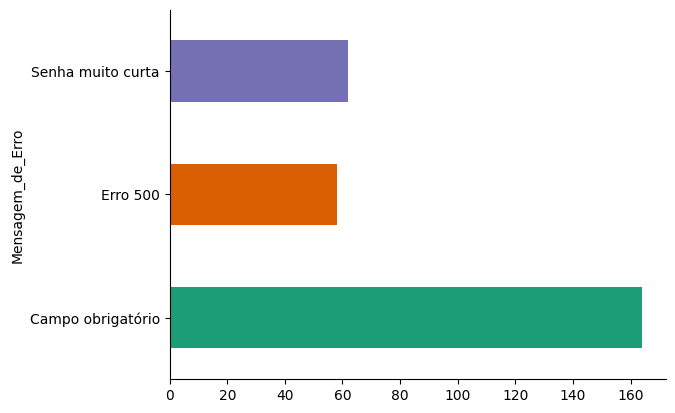

In [79]:
grupo_a_df.groupby('Mensagem_de_Erro').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

O gráfico demonstra que o maior erro refere-se aos campos obrigatórios, seguido por 'Senha muito curta' e 'Erro 500'. Como o objetivo está na primeira parte do formulário de recuperação de senha, provalvemente o erro referente a senha não se aplica nessa página, mas na conseguinte em que é escolhida uma nova senha para usuário, logo o foco deve estar, majoritariamente, no erro dos campos obrigatórios.

In [80]:
df_encoded_a = grupo_a_df[['Scroll_Profundidade', 'Cliques', 'Páginas_Visitadas', 'Tempo_Interação', 'Tentativa', 'Páginas_Visitadas', 'Taxa_de_Rejeição']]

In [81]:
import plotly.graph_objs as go

df_corr = df_encoded_a.corr()

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()


### Grupo B

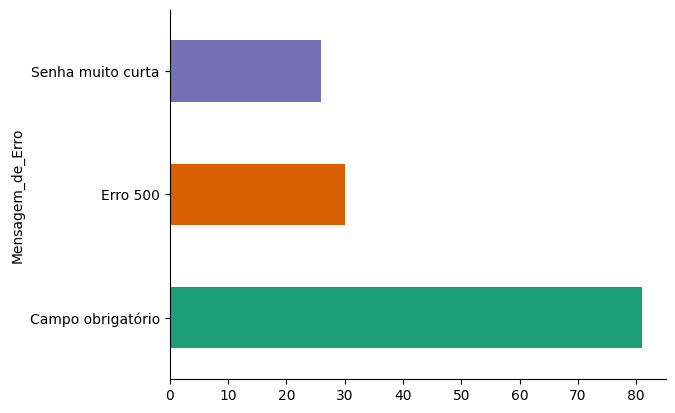

In [82]:
grupo_b_df.groupby('Mensagem_de_Erro').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

O gráfico demonstra que, após as mudanças, o erro de 'Senha muito curta' diminui em comparação ao 'Erro 500'. Isso indica que, caso as mudanças tenham sido feitas em busca de diminuir o erro de senha, pode ter surtido efeito, mas como o objetivo é nos erros da primeira parte do formulário de recuperação de senha, em que não existe um campo para digitar a senha, o efeito nessa página, provavelmente, não foi satisfatório com as mudanças.

In [83]:
df_encoded_b = grupo_b_df[['Scroll_Profundidade', 'Cliques', 'Páginas_Visitadas', 'Tempo_Interação', 'Tentativa', 'Páginas_Visitadas', 'Taxa_de_Rejeição']]

In [84]:
import plotly.graph_objs as go

df_corr = df_encoded_b.corr()

fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

A partir da matriz de correlação do grupo de teste (b), fica visível a mudança na correlação entre taxa de rejeição e tentativa em comparação a matriz de correlação do grupo de controle (a), indicando que, quanto maior a quantidade de tentativas do envio do formulário, maior a taxa de rejeição do mesmo por parte dos usuários.

### Tarefa 2: Levantamento da hipótese estatística

A partir das análises feitas, é possível perceber, primeiramente, que a mensagem de erros que mais aparece, tanto no grupo A, quanto no B, é 'Campo Obrigatório', numa quantidade expressivamente superior às demais. Junto à isso, a partir da matriz de correlação, fica claro que, a medida que o número de tentativas aumenta, a taxa de rejeição também aumenta, métrica que buscamos diminuir.

Tendo essas conclusões, pode-se inferir que o erro 'Campo obrigatório' é o mais comum e que persiste nas tentativas, levando à rejeição da página por parte dos usuários. A partir disso, são estabelecidas as hipóteses nula e alternativa.

$H_{0}$: Estabelecer claramente os campos obrigatórios para brasileiros e estrangeiros não irá reduzir as tentativas e nem a taxa de rejeição.

$H_{A}$: Estabelecer claramente os campos obrigatórios para brasileiros e estrangeiros irá reduzir as tentativas e, consequentemente, a taxa de rejeição.

### Tarefa 3: Proposta do Teste A/B

A partir das hipóteses estabelecidas e dos dados analisados, propõe-se dividir a tela entre estrangeiro e brasileiro, aplicando de maneira responsiva a seleção da categoria, visto que os dois possuem campos obrigatórios diferentes e comunicar claramente quais são os campos obrigatórios, substituindo * por 'Obrigatório'.

#### 3.1 Versão B modificada

##### Versão B - Nacionalidade brasileiro

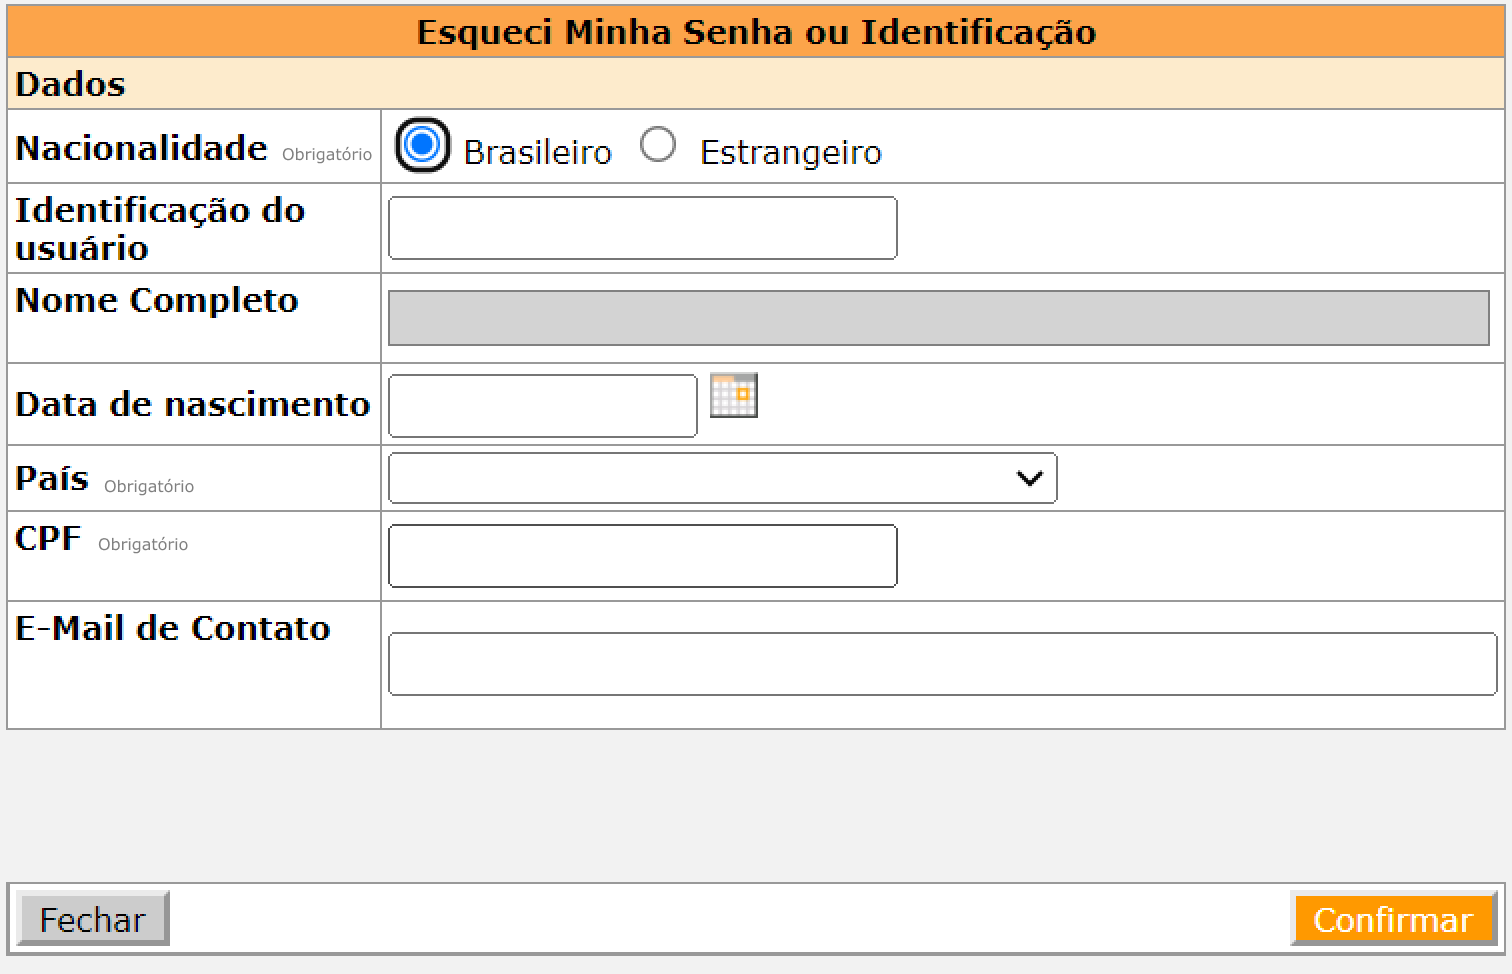

##### Versão B - nacionalidade estrangeiro

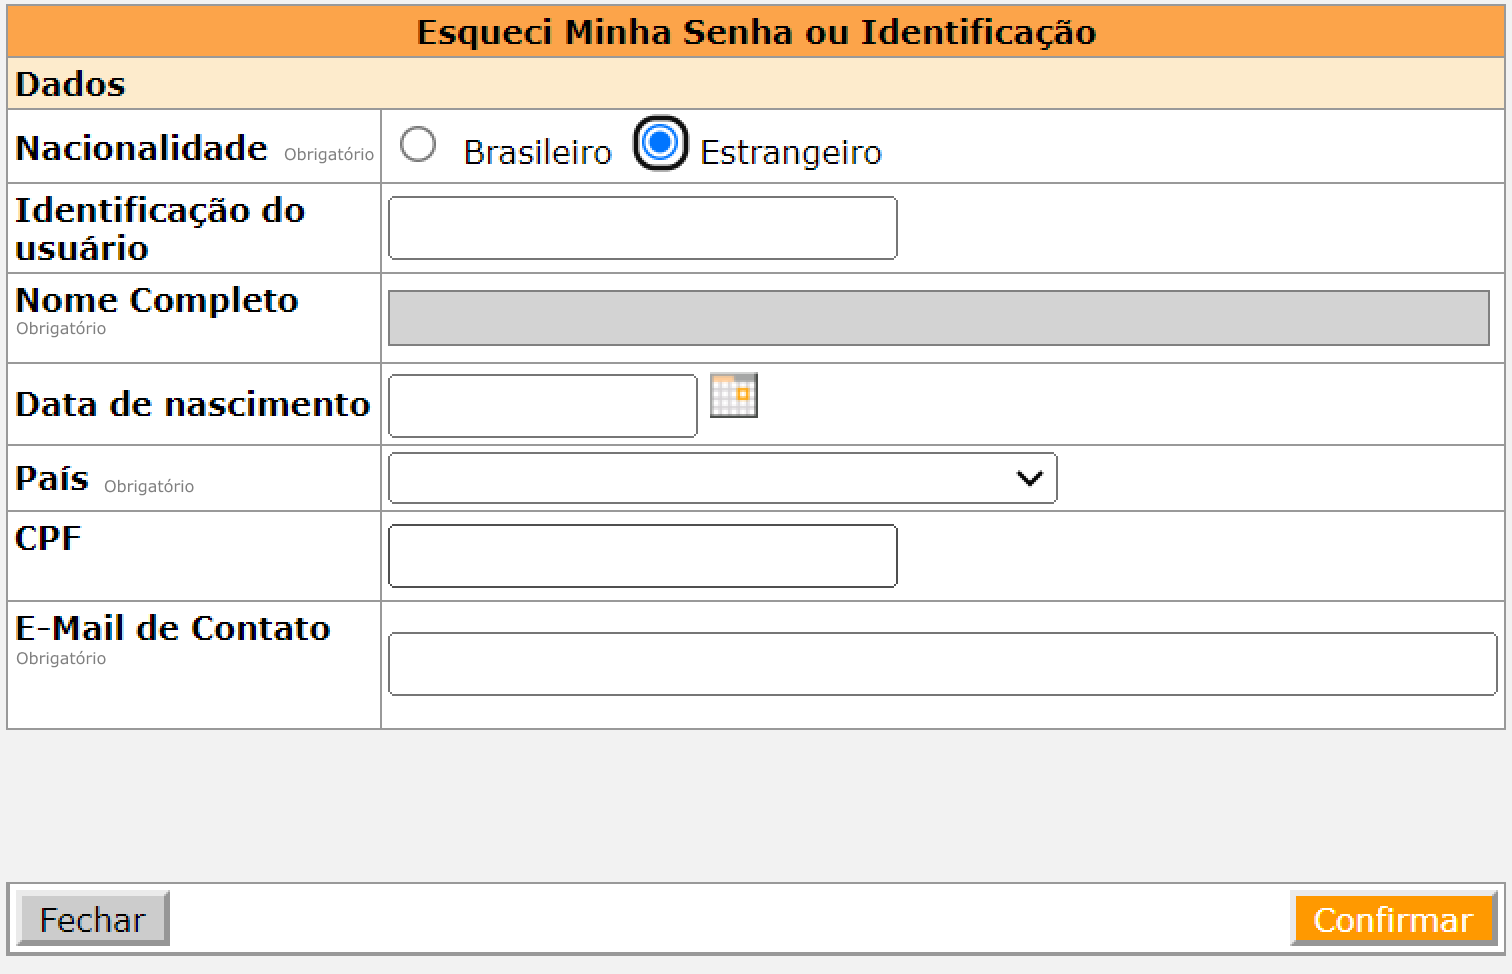

#### 3.2 Mapeamento e identificação do(s) elemento(s)

Os elementos alterados a fim de atingir o objetivo da hipótese alternativa são:
1. Arquitetura da Informação: Ao selecionar a categoria da Nacionalidade, os campos demarcados como obrigatórios mudam, ou seja, apenas os denominados obrigatórios a cada classificação são expressos na identificação, a fim de evitar a confusão de quais são os campos obrigatórios para sua nacionalidade e, assim, diminuir o número de tentativas de envio do formulário até o sucesso.
2. Redação estratégica: Foi retirada a indeitificação de campos obrigatórios de '*', com a descrição inferior 'Os campos marcados com * são obrigatórios.' para a inserção do texto 'Obrigatório' apenas nos campos definidos para cada nacionalidade (explicado no tópico anterior), a fim de deixar a mensagem mais clara para o usuário e diminuir o número de tentativas do envio do formulário por erros de 'Campo obrigatório'.

### Tarefa 4:Teste de significância estatística (Teste t)

In [93]:
ga = pd.read_csv('/content/ITL-SI10-2024-P2-analytics-durante-grupo-A.csv')

In [101]:
gb = pd.read_csv('/content/ITL-SI10-2024-P2-analytics-durante-grupo-B.csv')

In [103]:
grupo_controle = ga['Taxa_de_Rejeição']
grupo_experimental = gb['Taxa_de_Rejeição']

t_stat, p_value = stats.ttest_ind(grupo_controle, grupo_experimental)
print(f"Estatística t: {t_stat}, Valor-p: {p_value}")

Estatística t: 17.021597400473585, Valor-p: 1.5527919922731908e-59


A estatística t positiva indica que a média do grupo experimental é maior que a média do grupo controle. Junto com um valor-p maior que 0,05, a diferença entre os grupos não é estatisticamente significativa ao nível de 5%. Isso significa que a hipótese nula não deve ser rejeitada.